In [15]:
pip install --upgrade mysql-connector-python

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/99/86/4db455855116fc9aeb801154e0ba258ac7f76ed3f1c674068ca90c65da10/mysql_connector_python-8.3.0-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/15.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.4 MB 435.7 kB/s eta 0:00:36
   ---------------------------------------- 0.1/15.4 MB 919.0 kB/s eta 0:00:17
    --------------------------------------- 0.2/15.4 MB 1.9 MB/s eta 0:00:09
   - -------------------------------------- 0.5/15.4 MB 3.3 MB/s eta 0:00:05
   - -------------------------------------- 0.5/15.4 MB 3.3 MB/s eta 0:00:05
   -- ------------------------------------- 1.1/15.4 MB 3.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.5/15.4 MB 4.3 MB/s eta 0:00:04
   ----- ---------------------------------- 1.9/15.4 MB 5.1 MB/s eta 0:00:03
   -

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\typjo\\AppData\\Local\\Temp\\pip-uninstall-logwizxs\\libmysql.dll'
Consider using the `--user` option or check the permissions.



In [1]:
import mysql.connector 
from mysql.connector import Error
import pandas as pd
import seaborn as sns

In [2]:
def database_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
        host = host_name,
        user = user_name,
        passwd = user_password,
        db = db_name)
        print('MySQL Database Connection Successful...')
    except Error as err:
        print(f"Error: {err}")
    return connection

In [3]:
db_connect = database_connection('127.0.0.1','root','bellarmine1234', 'sakila')

MySQL Database Connection Successful...


In [4]:
import warnings
warnings.filterwarnings('ignore')

query = 'select name as "category", count(film_category.category_id) as "num_category" from film_category inner join category on film_category.category_id = category.category_id group by name order by count(film_category.category_id) desc;'
database = pd.read_sql(query, db_connect)
print(database)

       category  num_category
0        Sports            74
1       Foreign            73
2        Family            69
3   Documentary            68
4     Animation            66
5        Action            64
6           New            63
7         Drama            62
8         Games            61
9        Sci-Fi            61
10     Children            60
11       Comedy            58
12     Classics            57
13       Travel            57
14       Horror            56
15        Music            51


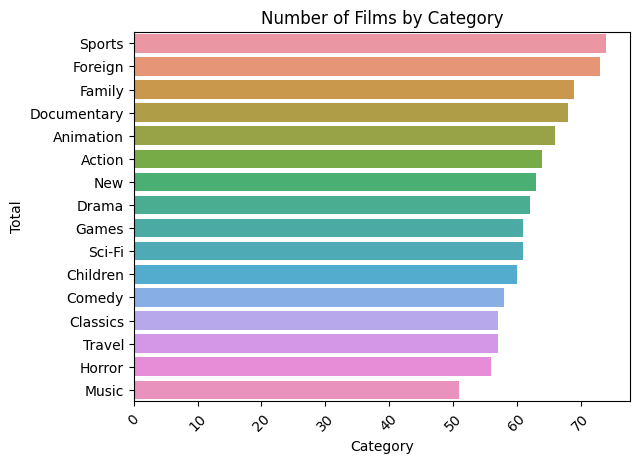

In [23]:
import matplotlib.pyplot as plt
query = "select name as 'category', count(film_category.category_id) as 'num_films' from film_category inner join category on film_category.category_id = category.category_id group by name order by count(film_category.category_id) desc;"
database = pd.read_sql(query, db_connect)

plot = sns.barplot(x = 'num_films', y = 'category', data = database, orient = 'h')
plt.title('Number of Films by Category')
plt.xlabel('Category')
plt.ylabel('Total')

plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

plt.show()

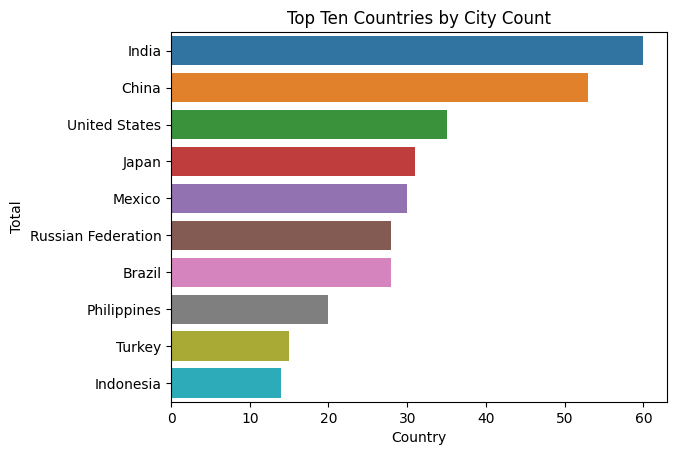

In [24]:
query = "select country, count(city) as 'num_cities'from city, country where city.country_id = country.country_id group by country order by count(city) desc limit 10;"
database = pd.read_sql(query, db_connect)

plot = sns.barplot(x = 'num_cities', y = 'country', data = database, orient='h')
plt.title('Top Ten Countries by City Count')
plt.xlabel('Country')
plt.ylabel('Total')



plt.show()

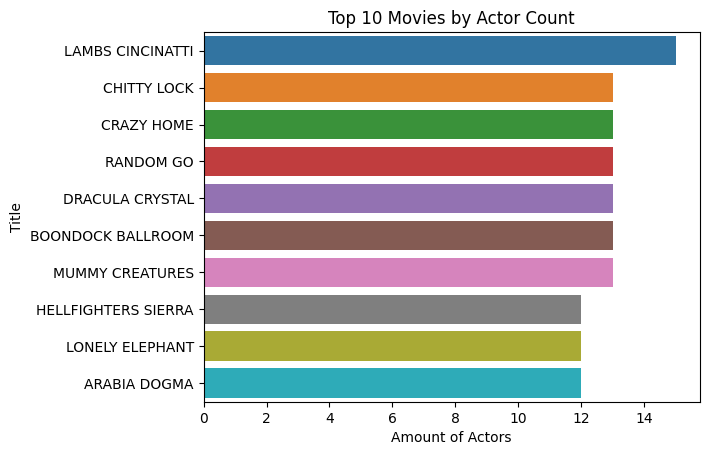

In [26]:
query = "select title, count(actor_id) as 'num_actors' from film inner join film_actor on film_actor.film_id = film.film_id group by title order by count(actor_id) desc limit 10;"
database = pd.read_sql(query, db_connect)

plot = sns.barplot(x = 'num_actors', y = 'title', data = database, orient='h')
plt.title('Top 10 Movies by Actor Count')
plt.xlabel('Amount of Actors')
plt.ylabel('Title')



plt.show()

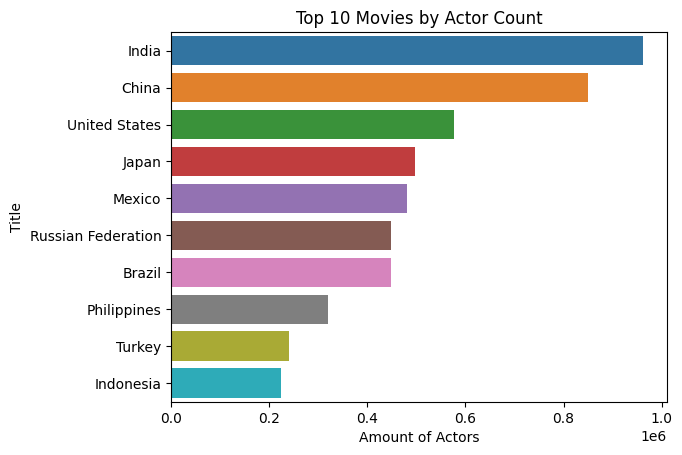

In [28]:
query = "select country, count(rental_id) as num_rented from rental inner join customer on rental.customer_id = rental.customer_id inner join address on customer.address_id = address.address_id  inner join city on address.city_id = city.city_id inner join country on city.country_id = country.country_id group by country.country_id order by count(rental_id) desc limit 10;"
database = pd.read_sql(query, db_connect)

plot = sns.barplot(x = 'num_rented', y = 'country', data = database, orient='h')
plt.title('Top 10 Movies by Actor Count')
plt.xlabel('Amount of Actors')
plt.ylabel('Title')



plt.show()